In [2]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Otimizacao de Hiperparametros
import optuna


### Carregar os Dados

In [3]:
# Carregar dados para o dataframe
df_frutas = pd.read_csv('datasets/fruit_quality.csv')

In [4]:
# Visualizar Dataframe
df_frutas.head(10)

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5     5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
6     6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
7     7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438   
8     8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921   
9     9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  
5 -2.981523     bad  
6  2.414171    good  
7 -1.470125    good  
8 -4.871905     bad  
9  2.185608     bad

In [5]:
df_frutas.tail(10)

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3990  3990 -1.396794 -0.599596  -1.931104     1.815668   1.670732  1.614027   
3991  3991 -4.007762  2.970164   0.218167    -0.492369   1.656375 -2.133895   
3992  3992  1.764253 -2.079695  -0.083383    -0.086724  -1.703385  3.840101   
3993  3993  1.520142 -0.352623  -3.206467     1.341719   0.675568  0.107093   
3994  3994  1.482508 -2.581181  -0.306888     1.527877   1.056361  2.560829   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
3990 -0.987968     bad  
3991 -4.431321    good  
3992 -0.338261    good  
3993 -0.945080     bad  
3994 -1.229255    good  
3995  0.137784     bad  
3996  1.854235    good  
3997 -1.334611     bad  
3998 -2.229720    good  
3999  1.599796    good

In [6]:
# Estrutuura do Dataframe
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## EDA

In [7]:
# Como está a distribuição da variálve target - Percentual
px.bar(df_frutas.value_counts('Quality') / len(df_frutas))

In [8]:
# Transformação da variável Quality para numérica
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [9]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [10]:
df_frutas.head(10)

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5     5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
6     6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
7     7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438   
8     8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921   
9     9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857   

    Acidity  Quality  
0 -0.491590        1  
1 -0.722809        1  
2  2.621636        0  
3  0.790723        1  
4  0.501984        1  
5 -2.981523        0  
6  2.414171        1  
7 -1.470125        1  
8 -4.871905        0  
9  2.185608        0

In [11]:
# Remover a coluna A_id, pois não tem poder preditivo
df_frutas.drop(columns=['A_id'], inplace=True)

In [12]:
df_frutas.head(10)

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523   
6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417  2.414171   
7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438 -1.470125   
8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921 -4.871905   
9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857  2.185608   

   Quality  
0        1  
1        1  
2        0  
3        1  
4        1  
5        0  
6        1  
7        1  
8        0  
9        0

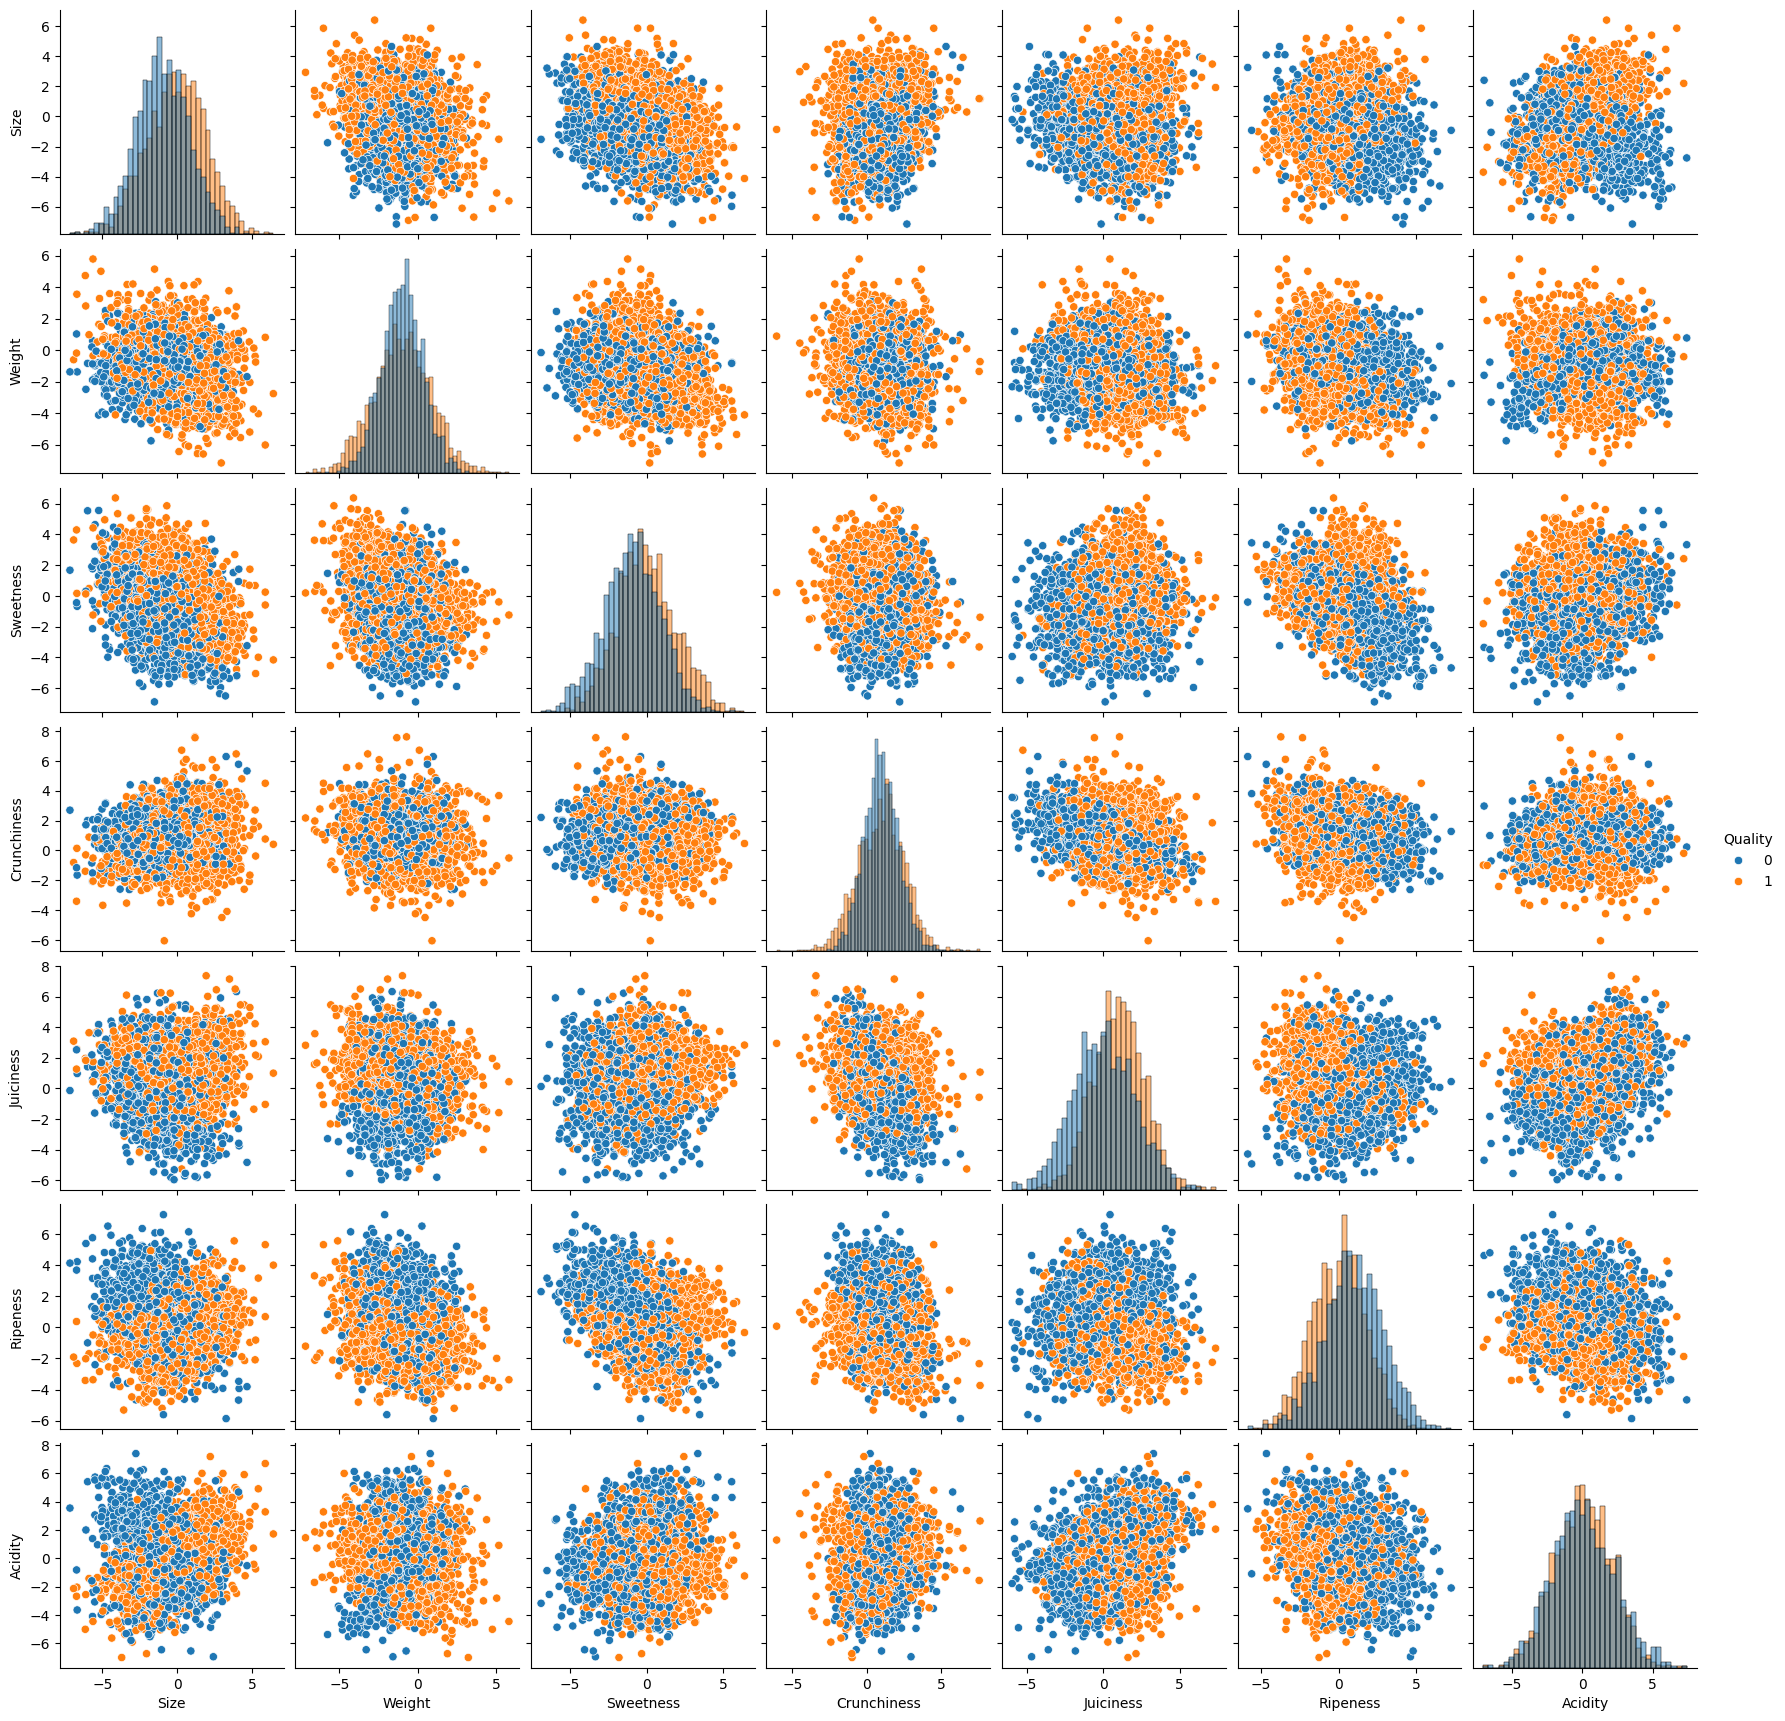

In [13]:
# Verifificar distribuição e as correlações entre as variáveis
sns.pairplot(df_frutas, hue='Quality', diag_kind='hist')

In [14]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Weight')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
# Boxplot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality', title='Boxplot Quality x Sweetness')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Sweetness')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Boxplot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality', title='Boxplot Quality x Size')

/home/vitor-linux/.local/share/virtualenvs/ia-para-produtos-regressao-logistica-ZGuaC-dK/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
# Teste de T-Student
# Um teste estatístico para verificar se existe uma diferença significativa entre as médias de 2 grupos
# H0: Não há diferença significativa entre as médias
# H1: Existe diferença significativa entre as médias

grupo_good_weight = df_frutas[df_frutas['Quality'] == 1]['Weight']
grupo_bad_weight = df_frutas[df_frutas['Quality'] == 0]['Weight']
ttest(x=grupo_good_weight, y=grupo_bad_weight, paired=False)

T          dof alternative     p-val         CI95%   cohen-d  \
T-test  0.089906  3599.742464   two-sided  0.928367  [-0.09, 0.1]  0.002841   

         BF10     power  
T-test  0.036  0.050925

Não há diferença significativa das médias de peso entre frutas boas e ruins

In [20]:
grupo_good_sweetness = df_frutas[df_frutas['Quality'] == 1]['Sweetness']
grupo_bad_sweetness = df_frutas[df_frutas['Quality'] == 0]['Sweetness']
ttest(x=grupo_good_sweetness, y=grupo_bad_sweetness, paired=False)

T          dof alternative         p-val         CI95%  \
T-test  16.396437  3995.125489   two-sided  1.590329e-58  [0.86, 1.09]   

        cohen-d       BF10  power  
T-test  0.51847  7.576e+54    1.0

Há diferença significativa das médias de doçura entre frutas boas e ruins

In [25]:
grupo_good_size = df_frutas[df_frutas['Quality'] == 1]['Size']
grupo_bad_size = df_frutas[df_frutas['Quality'] == 0]['Size']
ttest(x=grupo_good_size, y=grupo_bad_size, paired=False)

T          dof alternative         p-val         CI95%  \
T-test  15.912978  3951.450727   two-sided  2.602204e-55  [0.82, 1.06]   

        cohen-d       BF10  power  
T-test   0.5031  5.053e+51    1.0

Há diferença significativa das médias de tamanho entre frutas boas e ruins

In [ ]:
## Coor Matrix
corr_matrix = df_frutas.corr()
corr_matrix

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Quality      0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity   Quality  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Quality     -0.007697  1.000000

In [30]:
# Plot Heatmap
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=corr_matrix.columns,
        y=corr_matrix.index,
        z=np.array(corr_matrix),
        text=corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1,
    )
)
fig.show()